In [1]:
import os
import numpy as np
import scipy
from scipy import integrate
import matplotlib.pyplot as plt
import camb
from camb import model
from jupyterthemes import jtplot
import math
import time
import h5py
import sys
moments_path = os.path.realpath(os.path.join(os.getcwd(), '../Moments_analysis/'))
sys.path.insert(0, moments_path)
import h5py as h5
import healpy as hp
import pickle
import copy
def save_obj(name, obj):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, protocol = 2)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)#, encoding='latin1')

jtplot.reset()
from tqdm import tqdm




In [3]:
import get_unique_comb_kp2_kp3 as get_unique_ind

sdir = '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/saveDVs/'

sm_all = [21.0,33.6,54.,86., 137.6, 220.16]

nsm_all = len(sm_all)
nzbin_all = 4

_, id_kp2_unique, _, id_kp3_unique = get_unique_ind.save_unique_combs(nsm_all, nzbin_all)





In [4]:
fname = sdir + 'DV_allkappa_all_fid'
df_kappa_all = load_obj(fname)
kappa2_all_fid = df_kappa_all['kp2']
kappa3_all_fid = df_kappa_all['kp3']

kp2_all_fid = []
for jid_kp2 in range(len(id_kp2_unique)):
    jz1, jz2, i, j = id_kp2_unique[jid_kp2]
    kp2_all_fid.append(kappa2_all_fid[jz1, jz2, i, j])
kp2_all_fid = np.array(kp2_all_fid)

kp3_all_fid = []
for jid_kp3 in range(len(id_kp3_unique)):
    jz1, jz2, jz3, i, j, k = id_kp3_unique[jid_kp3]
    kp3_all_fid.append(kappa3_all_fid[jz1, jz2, jz3, i, j, k])
kp3_all_fid = np.array(kp3_all_fid)



In [20]:
# for jid_kp3 in range(len(id_kp3_unique)):
#     jz1, jz2, jz3, i, j, k = id_kp3_unique[jid_kp3]
#     if (j==k):
#         if (jz1==1):
#             print((jz1, jz2, jz3))
            
            

(1, 1, 1)
(1, 1, 1)
(1, 1, 1)
(1, 1, 1)
(1, 1, 1)
(1, 1, 1)
(1, 1, 1)
(1, 1, 1)
(1, 1, 1)
(1, 1, 1)
(1, 1, 1)
(1, 1, 1)
(1, 1, 1)
(1, 1, 1)
(1, 1, 1)
(1, 1, 1)
(1, 1, 1)
(1, 1, 1)
(1, 1, 1)
(1, 1, 1)
(1, 1, 1)
(1, 1, 2)
(1, 1, 2)
(1, 1, 2)
(1, 1, 2)
(1, 1, 2)
(1, 1, 2)
(1, 1, 2)
(1, 1, 2)
(1, 1, 2)
(1, 1, 2)
(1, 1, 2)
(1, 1, 2)
(1, 1, 2)
(1, 1, 2)
(1, 1, 2)
(1, 1, 2)
(1, 1, 2)
(1, 1, 2)
(1, 1, 2)
(1, 1, 2)
(1, 1, 2)
(1, 1, 3)
(1, 1, 3)
(1, 1, 3)
(1, 1, 3)
(1, 1, 3)
(1, 1, 3)
(1, 1, 3)
(1, 1, 3)
(1, 1, 3)
(1, 1, 3)
(1, 1, 3)
(1, 1, 3)
(1, 1, 3)
(1, 1, 3)
(1, 1, 3)
(1, 1, 3)
(1, 1, 3)
(1, 1, 3)
(1, 1, 3)
(1, 1, 3)
(1, 1, 3)
(1, 2, 2)
(1, 2, 2)
(1, 2, 2)
(1, 2, 2)
(1, 2, 2)
(1, 2, 2)
(1, 2, 2)
(1, 2, 2)
(1, 2, 2)
(1, 2, 2)
(1, 2, 2)
(1, 2, 2)
(1, 2, 2)
(1, 2, 2)
(1, 2, 2)
(1, 2, 2)
(1, 2, 2)
(1, 2, 2)
(1, 2, 2)
(1, 2, 2)
(1, 2, 2)
(1, 2, 3)
(1, 2, 3)
(1, 2, 3)
(1, 2, 3)
(1, 2, 3)
(1, 2, 3)
(1, 2, 3)
(1, 2, 3)
(1, 2, 3)
(1, 2, 3)
(1, 2, 3)
(1, 2, 3)
(1, 2, 3)
(1, 2, 3)
(1, 2, 3)
(1, 2, 3)


In [6]:
# np.amin((kp3_all_fid - kp3_all_fid.round(decimals=15))/kp3_all_fid)
len(kp2_all_fid), len(np.unique(kp2_all_fid)), len(np.unique(kp2_all_fid.round(decimals=15)))



(300, 210, 210)

In [5]:
len(kp3_all_fid), len(np.unique(kp3_all_fid)), len(np.unique(kp3_all_fid.round(decimals=15)))




(2600, 1120, 1068)

In [8]:
# len(id_kp2_unique)
un_val, un_id = np.unique(kp2_all_fid, return_index=True)



In [10]:
# np.sort(un_id)



array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  28,  29,  30,  31,  32,  35,  36,  37,  38,  42,  43,  44,
        49,  50,  56,  57,  58,  59,  60,  61,  62,  64,  65,  66,  67,
        68,  71,  72,  73,  74,  78,  79,  80,  85,  86,  92,  93,  94,
        95,  96,  97,  98, 100, 101, 102, 103, 104, 107, 108, 109, 110,
       114, 115, 116, 121, 122, 128, 129, 130, 131, 132, 133, 134, 135,
       136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
       149, 150, 151, 152, 153, 154, 155, 157, 158, 159, 160, 161, 164,
       165, 166, 167, 171, 172, 173, 178, 179, 185, 186, 187, 188, 189,
       190, 191, 193, 194, 195, 196, 197, 200, 201, 202, 203, 207, 208,
       209, 214, 215, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230,
       231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,
       244, 245, 246, 247, 248, 250, 251, 252, 253, 254, 257, 25

In [14]:
# id_kp2_unique[27]
# kp2_all_fid[27]
# np.where(kp2_all_fid == kp2_all_fid[27])[0]
id_kp2_unique[22], id_kp2_unique[27]




((0, 1, 0, 1), (0, 1, 1, 0))

In [17]:
jr_lhs = 0
nsamp_lhs = 50000

kp2_all_lhs = []
kp3_all_lhs = []

for jl in tqdm(range(nsamp_lhs)):
    fname = sdir + 'lhs_n' + str(nsamp_lhs) + '_jr' + str(jr_lhs) + '/kappa_all_jlhs' + str(jl)
    df_kappa_all = load_obj(fname)
    kappa2_all = df_kappa_all['kp2']
    kappa3_all = df_kappa_all['kp3']

    kp2_all = []
    for jid_kp2 in range(len(id_kp2_unique)):
        jz1, jz2, i, j = id_kp2_unique[jid_kp2]
        kp2_all.append(kappa2_all[jz1, jz2, i, j])
    kp2_all = np.array(kp2_all)

    # kp2_all_lhs[jl, :] = np.array(kp2_all)

    kp3_all = []
    for jid_kp3 in range(len(id_kp3_unique)):
        jz1, jz2, jz3, i, j, k = id_kp3_unique[jid_kp3]
        kp3_all.append(kappa3_all[jz1, jz2, jz3, i, j, k])
    kp3_all = np.array(kp3_all)
    
    if np.all(np.isfinite(kp2_all)) and np.all(np.isfinite(kp3_all)):
        kp2_all_lhs.append(kp2_all)
        kp3_all_lhs.append(kp3_all)
    
    # kp3_all_lhs[jl, :] = np.array(kp3_all)    

    



100%|██████████| 50000/50000 [11:26<00:00, 72.82it/s] 


In [18]:
kp2_all_lhs = np.vstack(kp2_all_lhs)
kp3_all_lhs = np.vstack(kp3_all_lhs)




In [19]:
kp3_all_lhs.shape, kp2_all_lhs.shape, kp2_all_fid.shape


((50000, 1120), (50000, 210), (210,))

In [34]:
nsim2, ncomp2 = kp2_all_lhs.shape[0], kp2_all_lhs.shape[1] 
nsim3, ncomp3 = kp3_all_lhs.shape[0], kp3_all_lhs.shape[1] 

# kp2_vec_all_fid.shape, kp3_vec_all_fid.shape
kp2_all_fid_mat = np.tile(kp2_all_fid.reshape(1, ncomp2), (nsim2, 1))
kp3_all_fid_mat = np.tile(kp3_all_fid.reshape(1, ncomp3), (nsim3, 1))






In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
kp3_all_lhs_normalised = sc.fit_transform(kp3_all_lhs)



In [64]:
sc2 = StandardScaler()
kp2_all_lhs_normalised = sc2.fit_transform(kp2_all_lhs)




In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9999,whiten=True)
pca.fit(kp3_all_lhs_normalised)
print(pca.explained_variance_ratio_)



[6.33481864e-01 1.24473590e-01 8.39057662e-02 4.43281101e-02
 3.62829061e-02 2.67912910e-02 1.67086783e-02 7.90305023e-03
 6.59812125e-03 4.06645595e-03 3.57271812e-03 3.23161196e-03
 1.94625149e-03 1.37590915e-03 9.30602008e-04 7.21622570e-04
 6.98953285e-04 4.91247358e-04 4.29910174e-04 3.86280947e-04
 3.21725904e-04 2.19867850e-04 1.79519058e-04 1.60287606e-04
 1.31635944e-04 9.54761495e-05 8.90019544e-05 7.50598250e-05
 5.62131805e-05 4.25351855e-05 4.14842795e-05 3.19590073e-05
 2.90524016e-05 2.47539219e-05 2.12500036e-05 1.82159523e-05
 1.66434903e-05 1.50624822e-05 1.04063395e-05]


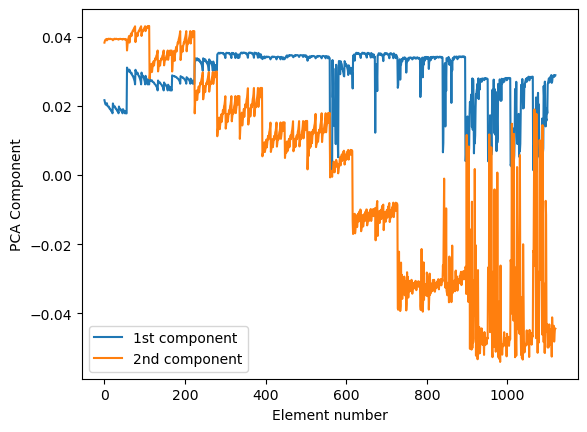

In [63]:
# (pca.components_).shape
pl.figure()
pl.plot((pca.components_)[0,:], label='1st component')
pl.plot((pca.components_)[1,:], label='2nd component')
# pl.plot((pca.components_)[2,:])
# pl.yscale('log')
pl.xlabel('Element number')
pl.ylabel('PCA Component')
pl.legend()
pl.show()




In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9999,whiten=True)
pca.fit(kp2_all_lhs_normalised)
print(pca.explained_variance_ratio_, (pca.components_).shape)



[6.84497145e-01 1.77061236e-01 9.70216108e-02 1.62972715e-02
 8.10370737e-03 6.85406080e-03 3.56296555e-03 2.55676983e-03
 1.49207592e-03 9.89730585e-04 5.95618599e-04 3.42129943e-04
 1.81715954e-04 1.36019132e-04 9.14816849e-05 8.05633247e-05
 4.83994026e-05] (17, 210)


In [35]:
# kappa3_vec_all_lhs
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca.fit(kp2_all_lhs/kp2_all_fid_mat)
print(pca.explained_variance_ratio_)






[6.95384940e-01 2.94169850e-01 5.17689087e-03 3.03934676e-03
 1.38284890e-03 7.08085472e-04 5.21653164e-05 3.62951252e-05]


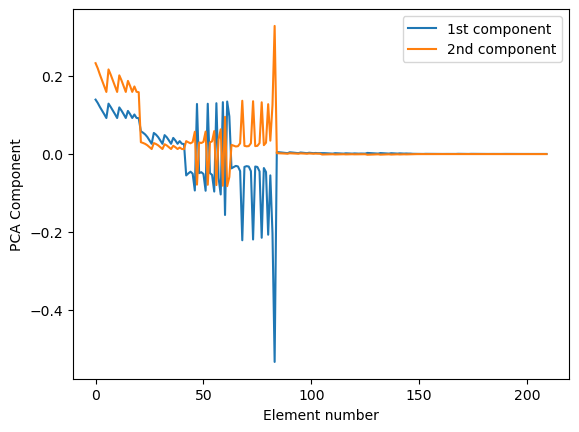

In [36]:
# np.min(kp3_all_lhs)
# np.max(kp3_all_fid)
# (pca.components_).shape
pl.figure()
pl.plot((pca.components_)[0,:], label='1st component')
pl.plot((pca.components_)[1,:], label='2nd component')
# pl.plot((pca.components_)[2,:])
# pl.yscale('log')
pl.xlabel('Element number')
pl.ylabel('PCA Component')
pl.legend()
pl.show()




In [37]:
# kappa3_vec_all_lhs
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca.fit(kp3_all_lhs/kp3_all_fid_mat)
print(pca.explained_variance_ratio_)




[9.88915081e-01 7.10839212e-03 2.19047745e-03 7.63753165e-04
 5.22358655e-04 2.99507237e-04 7.10527211e-05 4.35156571e-05]


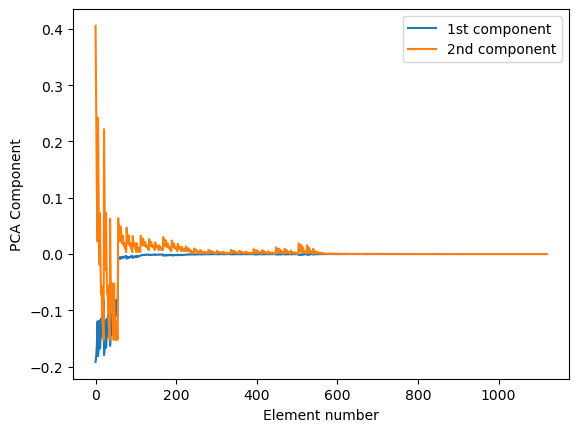

In [38]:
# (pca.components_).shape
pl.figure()
pl.plot((pca.components_)[0,:], label='1st component')
pl.plot((pca.components_)[1,:], label='2nd component')
# pl.plot((pca.components_)[2,:])
# pl.yscale('log')
pl.xlabel('Element number')
pl.ylabel('PCA Component')
pl.legend()
pl.show()



In [39]:
# (pca.components_)[0,:]



array([-1.91718500e-01, -1.85521260e-01, -1.77670749e-01, ...,
       -1.60338974e-06, -1.46946046e-06, -1.53450428e-06])

In [25]:
jr_lhs = 0
nsamp_lhs = 50000

kp2_all_lhs_only34 = []
kp3_all_lhs_only34 = []

for jl in tqdm(range(nsamp_lhs)):
    fname = sdir + 'lhs_n' + str(nsamp_lhs) + '_jr' + str(jr_lhs) + '/kappa_all_jlhs' + str(jl)
    df_kappa_all = load_obj(fname)
    kappa2_all = df_kappa_all['kp2']
    kappa3_all = df_kappa_all['kp3']

    kp2_all = []
    for jid_kp2 in range(len(id_kp2_unique)):
        jz1, jz2, i, j = id_kp2_unique[jid_kp2]
        if (jz1>1) and (jz2>1):
            kp2_all.append(kappa2_all[jz1, jz2, i, j])
    kp2_all = np.array(kp2_all)

    # kp2_all_lhs[jl, :] = np.array(kp2_all)

    kp3_all = []
    for jid_kp3 in range(len(id_kp3_unique)):
        jz1, jz2, jz3, i, j, k = id_kp3_unique[jid_kp3]
        if (jz1>1) and (jz2>1) and (jz3>1):       
            kp3_all.append(kappa3_all[jz1, jz2, jz3, i, j, k])
    kp3_all = np.array(kp3_all)
    
    if np.all(np.isfinite(kp2_all)) and np.all(np.isfinite(kp3_all)):
        kp2_all_lhs_only34.append(kp2_all)
        kp3_all_lhs_only34.append(kp3_all)
    
    # kp3_all_lhs[jl, :] = np.array(kp3_all)    

    



100%|██████████| 50000/50000 [02:42<00:00, 307.71it/s]


In [29]:
fname = sdir + 'DV_allkappa_all_fid'
df_kappa_all = load_obj(fname)
kappa2_all_fid = df_kappa_all['kp2']
kappa3_all_fid = df_kappa_all['kp3']

kp2_all_fid_only34 = []
for jid_kp2 in range(len(id_kp2_unique)):
    jz1, jz2, i, j = id_kp2_unique[jid_kp2]
    if (jz1>1) and (jz2>1):
        kp2_all_fid_only34.append(kappa2_all_fid[jz1, jz2, i, j])
kp2_all_fid_only34 = np.array(kp2_all_fid_only34)

kp3_all_fid_only34 = []
for jid_kp3 in range(len(id_kp3_unique)):
    jz1, jz2, jz3, i, j, k = id_kp3_unique[jid_kp3]
    if (jz1>1) and (jz2>1) and (jz3>1):
        kp3_all_fid_only34.append(kappa3_all_fid[jz1, jz2, jz3, i, j, k])
kp3_all_fid_only34 = np.array(kp3_all_fid_only34)



[9.58916611e-01 2.29492686e-02 1.18418884e-02 5.42011348e-03
 3.92748114e-04 3.68889276e-04 9.09280772e-05 1.14635413e-05]


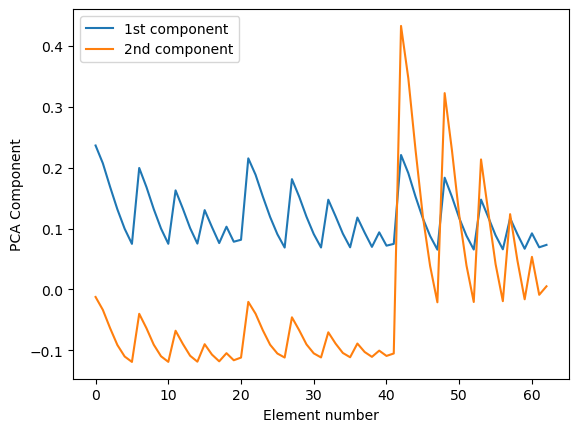

[9.92384676e-01 6.06516706e-03 8.92297103e-04 3.83420433e-04
 1.11533189e-04 6.29856464e-05 3.55624554e-05 2.60640888e-05]


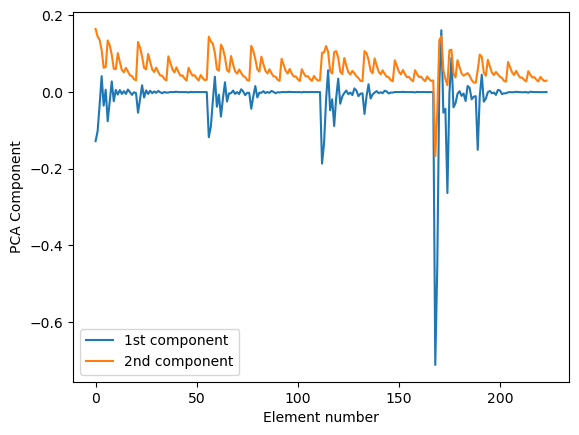

In [31]:
kp2_all_lhs_only34 = np.vstack(kp2_all_lhs_only34)
kp3_all_lhs_only34 = np.vstack(kp3_all_lhs_only34)

nsim2, ncomp2 = kp2_all_lhs_only34.shape[0], kp2_all_lhs_only34.shape[1] 
nsim3, ncomp3 = kp3_all_lhs_only34.shape[0], kp3_all_lhs_only34.shape[1] 

# kp2_vec_all_fid.shape, kp3_vec_all_fid.shape
kp2_all_fid_mat = np.tile(kp2_all_fid_only34.reshape(1, ncomp2), (nsim2, 1))
kp3_all_fid_mat = np.tile(kp3_all_fid_only34.reshape(1, ncomp3), (nsim3, 1))


# kappa3_vec_all_lhs
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca.fit(kp2_all_lhs_only34/kp2_all_fid_mat)
print(pca.explained_variance_ratio_)

pl.figure()
pl.plot((pca.components_)[0,:], label='1st component')
pl.plot((pca.components_)[1,:], label='2nd component')
# pl.plot((pca.components_)[2,:])
# pl.yscale('log')
pl.xlabel('Element number')
pl.ylabel('PCA Component')
pl.legend()
pl.show()




# kappa3_vec_all_lhs
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca.fit(kp3_all_lhs_only34/kp3_all_fid_mat)
print(pca.explained_variance_ratio_)


pl.figure()
pl.plot((pca.components_)[0,:], label='1st component')
pl.plot((pca.components_)[1,:], label='2nd component')
# pl.plot((pca.components_)[2,:])
# pl.yscale('log')
pl.xlabel('Element number')
pl.ylabel('PCA Component')
pl.legend()
pl.show()





In [33]:
# kp3_all_fid_only34



In [40]:
kp2_all_1P = []
kp3_all_1P = []

for jl in tqdm(range(320)):
    fname = sdir + '1Pset' + '/kappa_all_jlhs' + str(jl)
    df_kappa_all = load_obj(fname)
    kappa2_all = df_kappa_all['kp2']
    kappa3_all = df_kappa_all['kp3']

    kp2_all = []
    for jid_kp2 in range(len(id_kp2_unique)):
        jz1, jz2, i, j = id_kp2_unique[jid_kp2]
        kp2_all.append(kappa2_all[jz1, jz2, i, j])
    kp2_all = np.array(kp2_all)

    # kp2_all_lhs[jl, :] = np.array(kp2_all)

    kp3_all = []
    for jid_kp3 in range(len(id_kp3_unique)):
        jz1, jz2, jz3, i, j, k = id_kp3_unique[jid_kp3]
        kp3_all.append(kappa3_all[jz1, jz2, jz3, i, j, k])
    kp3_all = np.array(kp3_all)
    
    # if np.all(np.isfinite(kp2_all)) and np.all(np.isfinite(kp3_all)):
    kp2_all_1P.append(kp2_all)
    kp3_all_1P.append(kp3_all)
    




100%|██████████| 320/320 [00:07<00:00, 44.38it/s]


In [41]:
kp2_all_1P = np.vstack(kp2_all_1P)
kp3_all_1P = np.vstack(kp3_all_1P)



In [6]:
# kp3_all_1P



In [42]:
sdir = '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/saveDVs/'
all_params = np.loadtxt(sdir + '1P_set_samp.txt')
import configparser
config = configparser.ConfigParser()

fname = '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/gen_moments/cosmosis/ini/test_values.ini'
config.read(fname)


sec_names = list(config.keys())[1:]

all_vary_names = []
all_vary_minv = []
all_vary_maxv = []
all_vary_fidv = []
for sec in sec_names:
    var_names = list(config[sec].keys())
    for var in var_names:
        rangev = (config[sec][var])
        rangev_arr = list(map(float,rangev.split())) 
        if len(rangev_arr) > 1:
            all_vary_names.append(sec + '--' + var)
            all_vary_minv.append(rangev_arr[0])
            all_vary_maxv.append(rangev_arr[2])
            all_vary_fidv.append(rangev_arr[1])

    
nvar_all = len(all_vary_names)



In [49]:
np.min(np.abs(kp3_all_1P[jlhs,:]/kp3_all_fid))


0.016132103002995484

In [54]:
# pl.figure()
# pl.plot(kp3_all_fid)
# pl.yscale('log')
# pl.show()


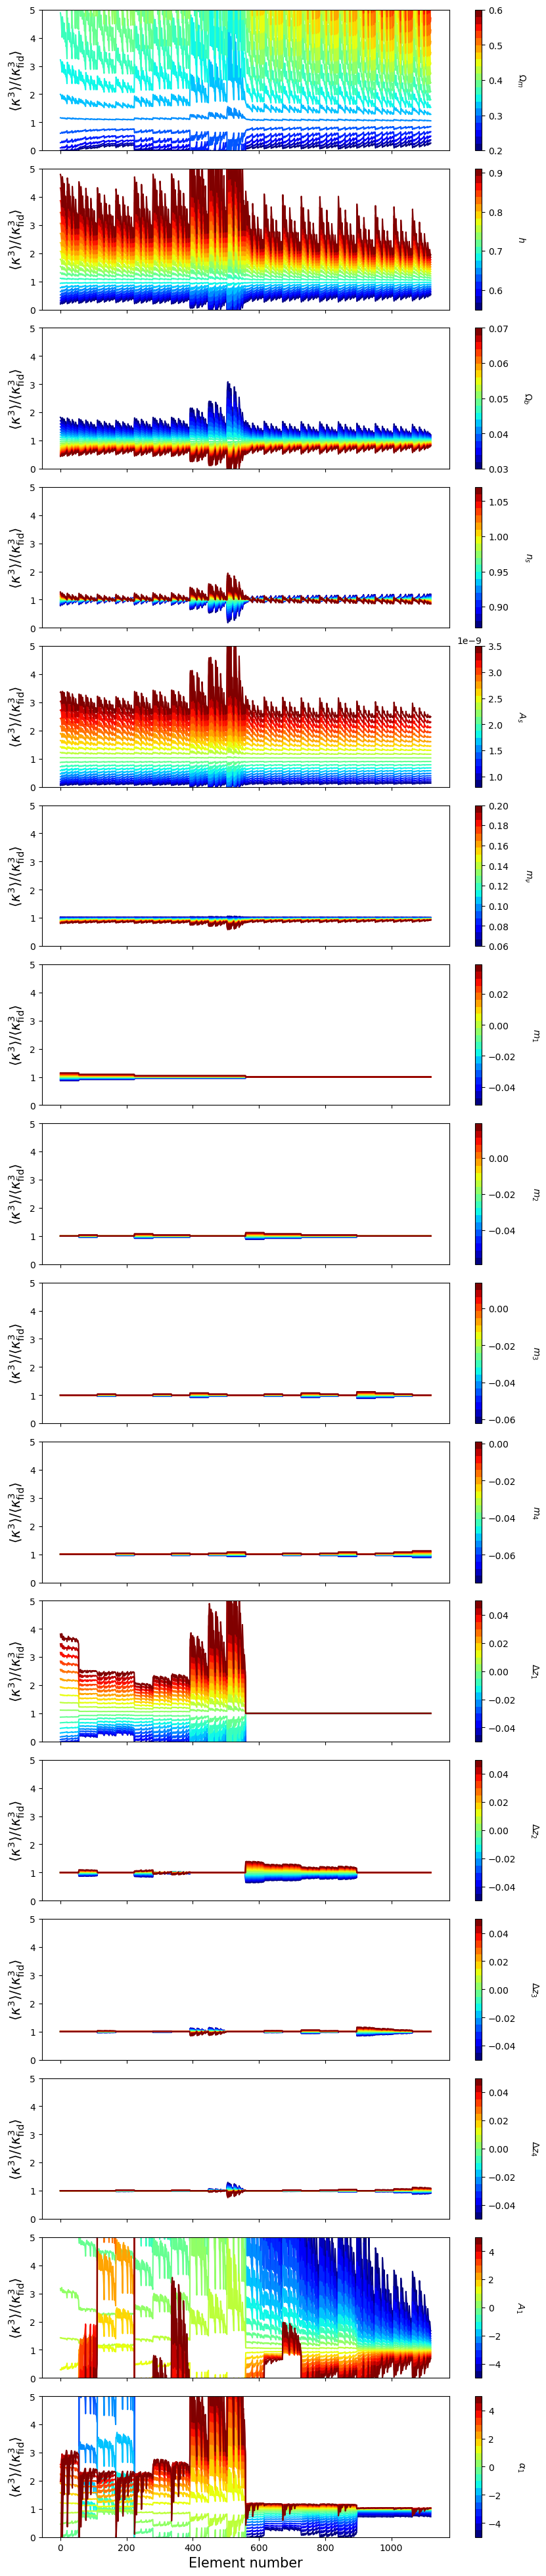

In [55]:
# sig8_all


cmap = pl.get_cmap('jet',20)
params_all_vary_latex = [r'$\Omega_m$',  r'$h$', r'$\Omega_b$', r'$n_s$', r'$A_s$', r'$m_{\nu}$',
                         r'$m_1$',r'$m_2$',r'$m_3$',r'$m_4$',r'$\Delta z_1$',r'$\Delta z_2$',
                         r'$\Delta z_3$',r'$\Delta z_4$',r'$A_1$',r'$\alpha_1$'] 
params_all_vary_names = all_vary_names
nvar = len(params_all_vary_names)
fig, ax_all = pl.subplots(nvar,1,figsize = (10,50), sharex=True,gridspec_kw = {'hspace':0.13, 'wspace':0.11})
for jparam in range(len(params_all_vary_names)):
    ax = ax_all[jparam]
    k=0
    for jlhs in (np.arange(20*jparam,20*(jparam+1))):
        try:
            ax.plot(kp3_all_1P[jlhs,:]/kp3_all_fid, color=cmap(k))
        except:
            pass
        k += 1
    ax.set_ylabel(r'$\langle \kappa^3 \rangle/\langle \kappa^3_{\rm fid} \rangle$', size=15)
    ax.set_ylim(0, 5)
    if jparam == len(params_all_vary_names)-1:
        ax.set_xlabel('Element number', size = 15)
    
    param_val_jp = all_params[20*(jparam):20*(jparam+1),jparam+1]
    norm = matplotlib.colors.Normalize(vmin=np.amin(param_val_jp),vmax=np.amax(param_val_jp))
    sm = pl.cm.ScalarMappable(cmap=cmap, norm=norm)
    # sm.set_array([])
    # ax.subplots_adjust(right=0.945)
    # cbar_ax = fig.add_axes([0.95, 0.15, 0.01, 0.7])
    cbar = pl.colorbar(sm, ax=ax)
    cbar.ax.get_yaxis().labelpad = 26
    cbar.ax.set_ylabel(params_all_vary_latex[jparam], rotation=270)
# pl.tight_layout()    
# pl.savefig('Y__M5p3_M_plot_param_' + str(params_all_vary_names[paramv]) + '.pdf', bbox_inches='tight')
pl.savefig('Vary_DVkp3_params_zoom.pdf',bbox_inches='tight')
pl.show()
    


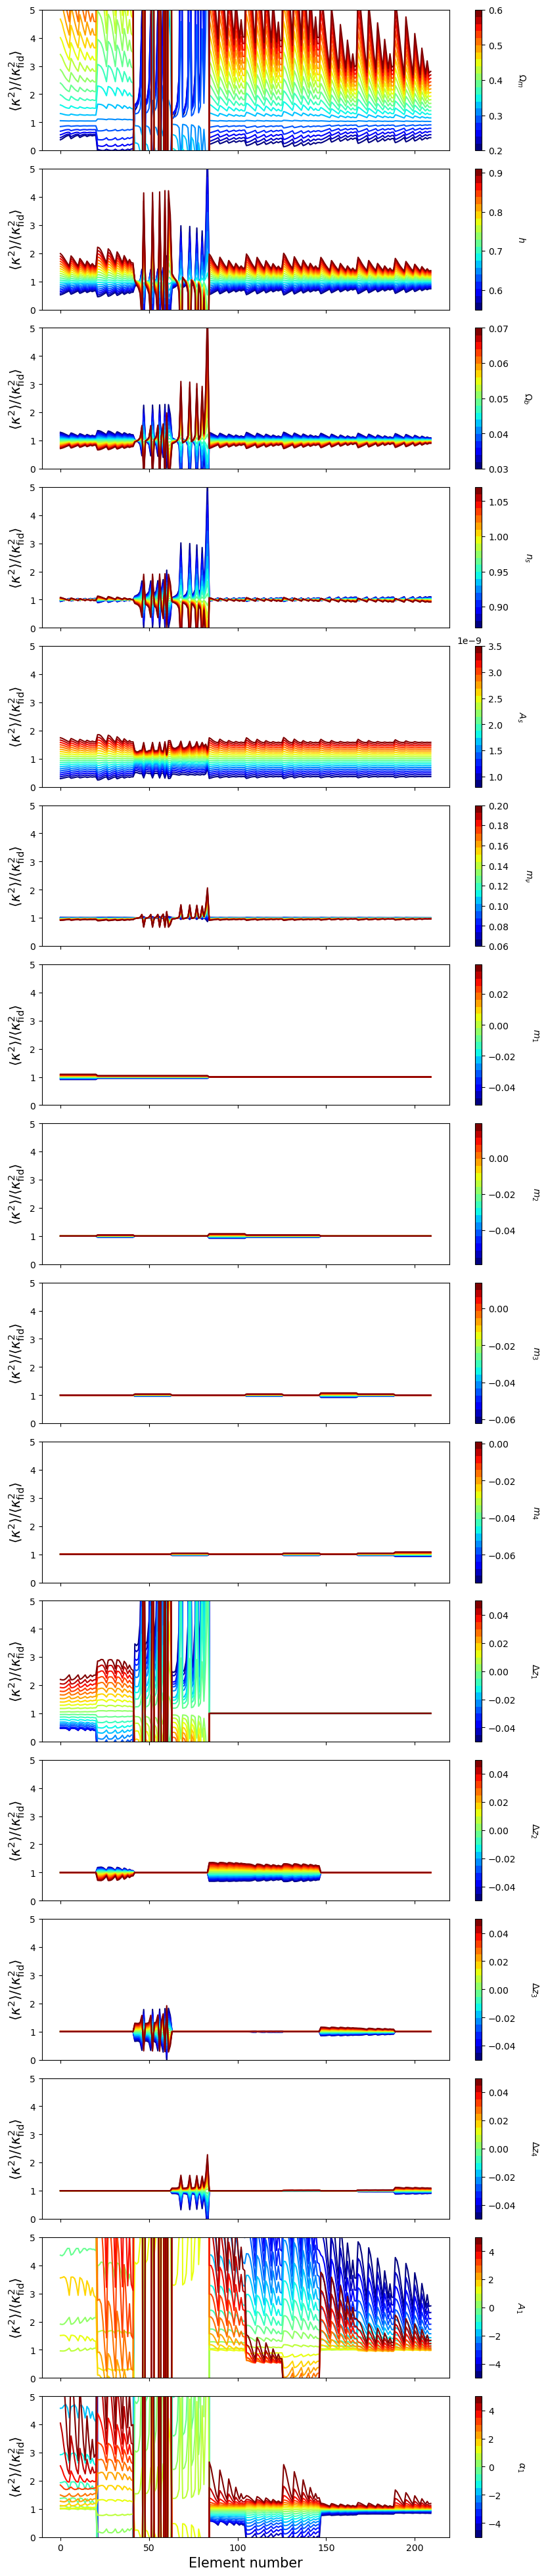

In [56]:
# sig8_all
cmap = pl.get_cmap('jet',20)
params_all_vary_latex = [r'$\Omega_m$',  r'$h$', r'$\Omega_b$', r'$n_s$', r'$A_s$', r'$m_{\nu}$',
                         r'$m_1$',r'$m_2$',r'$m_3$',r'$m_4$',r'$\Delta z_1$',r'$\Delta z_2$',
                         r'$\Delta z_3$',r'$\Delta z_4$',r'$A_1$',r'$\alpha_1$'] 
params_all_vary_names = all_vary_names
nvar = len(params_all_vary_names)
fig, ax_all = pl.subplots(nvar,1,figsize = (10,50), sharex=True,gridspec_kw = {'hspace':0.13, 'wspace':0.11})
for jparam in range(len(params_all_vary_names)):
    ax = ax_all[jparam]
    k=0
    for jlhs in (np.arange(20*jparam,20*(jparam+1))):
        try:
            ax.plot(kp2_all_1P[jlhs,:]/kp2_all_fid, color=cmap(k))
        except:
            pass
        k += 1
    ax.set_ylabel(r'$\langle \kappa^2 \rangle/\langle \kappa^2_{\rm fid} \rangle$', size=15)
    ax.set_ylim(0, 5)
    if jparam == len(params_all_vary_names)-1:
        ax.set_xlabel('Element number', size = 15)
    
    param_val_jp = all_params[20*(jparam):20*(jparam+1),jparam+1]
    norm = matplotlib.colors.Normalize(vmin=np.amin(param_val_jp),vmax=np.amax(param_val_jp))
    sm = pl.cm.ScalarMappable(cmap=cmap, norm=norm)
    # sm.set_array([])
    # ax.subplots_adjust(right=0.945)
    # cbar_ax = fig.add_axes([0.95, 0.15, 0.01, 0.7])
    cbar = pl.colorbar(sm, ax=ax)
    cbar.ax.get_yaxis().labelpad = 26
    cbar.ax.set_ylabel(params_all_vary_latex[jparam], rotation=270)
# pl.tight_layout()    
# pl.savefig('Y__M5p3_M_plot_param_' + str(params_all_vary_names[paramv]) + '.pdf', bbox_inches='tight')
pl.savefig('Vary_DVkp2_params_zoom.pdf',bbox_inches='tight')
pl.show()
    


In [9]:
kp2_all_1P_only34 = []
kp3_all_1P_only34 = []

for jl in tqdm(range(320)):
    fname = sdir + '1Pset' + '/kappa_all_jlhs' + str(jl)
    df_kappa_all = load_obj(fname)
    kappa2_all = df_kappa_all['kp2']
    kappa3_all = df_kappa_all['kp3']

    kp2_all = []
    for jid_kp2 in range(len(id_kp2_unique)):
        jz1, jz2, i, j = id_kp2_unique[jid_kp2]
        if (jz1>1) and (jz2>1):
            kp2_all.append(kappa2_all[jz1, jz2, i, j])
    kp2_all = np.array(kp2_all)

    # kp2_all_lhs[jl, :] = np.array(kp2_all)

    kp3_all = []
    for jid_kp3 in range(len(id_kp3_unique)):
        jz1, jz2, jz3, i, j, k = id_kp3_unique[jid_kp3]
        if (jz1>1) and (jz2>1) and (jz3>1):    
            kp3_all.append(kappa3_all[jz1, jz2, jz3, i, j, k])
    kp3_all = np.array(kp3_all)
    
    # if np.all(np.isfinite(kp2_all)) and np.all(np.isfinite(kp3_all)):
    kp2_all_1P_only34.append(kp2_all)
    kp3_all_1P_only34.append(kp3_all)
    




[(0, 3, 2, 3),
 (0, 3, 2, 4),
 (0, 3, 2, 5),
 (0, 3, 3, 3),
 (0, 3, 3, 4),
 (0, 3, 3, 5),
 (0, 3, 4, 4),
 (0, 3, 4, 5),
 (0, 3, 5, 5),
 (1, 1, 0, 0)]

In [13]:
print(kp2_all_1P[19,75:85]/kp2_all_fid[75:85])



[ -15.76588655  -22.55836347 -117.70590761  -17.26020794  -23.4027892
 -113.18866165  -27.90822649 -110.77350735 -290.44320398    7.59361786]


In [ ]:
(0, 3, 5, 5)

